# 神经网络

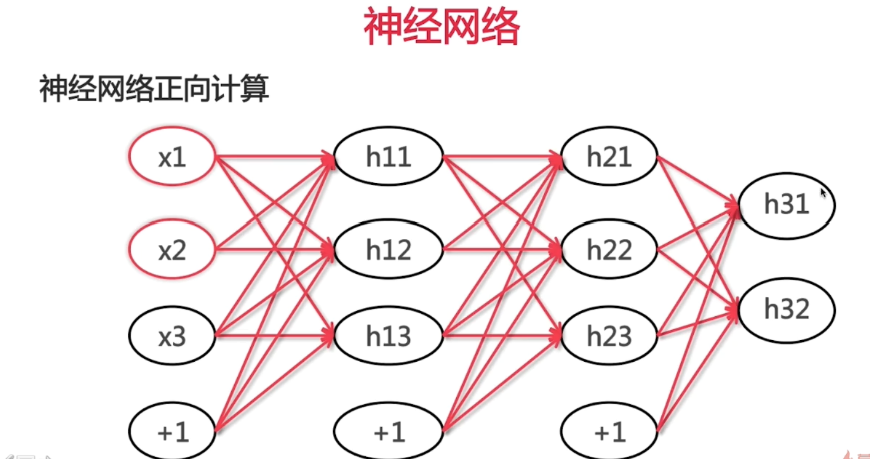

## 梯度下降

类似下山问题：

 【TensorFlow】优化方法optimizer总结（SGD，Adagrad，Adadelta，Adam，Adamax，Nadam）
 
    参考链接：https://blog.csdn.net/stay_foolish12/article/details/89349160?utm_medium=distribute.pc_relevant.none-task-blog-title-3&spm=1001.2101.3001.4242

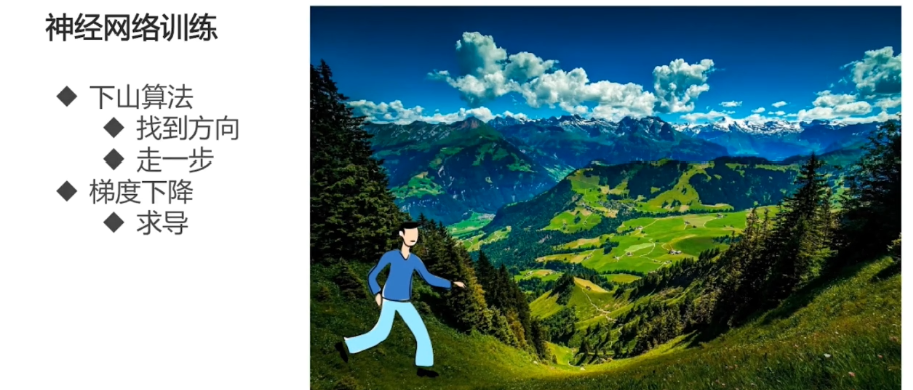

所谓的深度神经网络是指层次非常深的神经网络

# 激活函数

常用的激活函数如下:

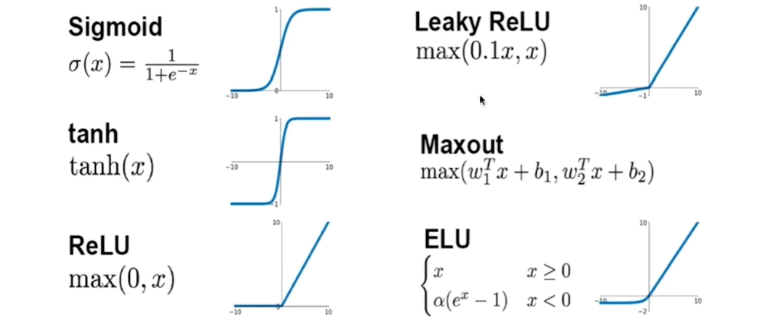

# 归一化与批归一化

归一化

    1) Min-max 归一化 x = (x - min) / (max - min)

    2) Z-score 归一化 x = (x - u) / std

批归一化

    1) 每层的激活值都做归一化

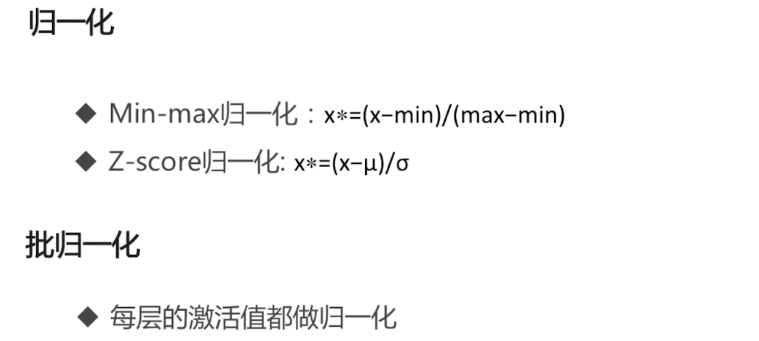

为啥归一化，作用是什么？ 

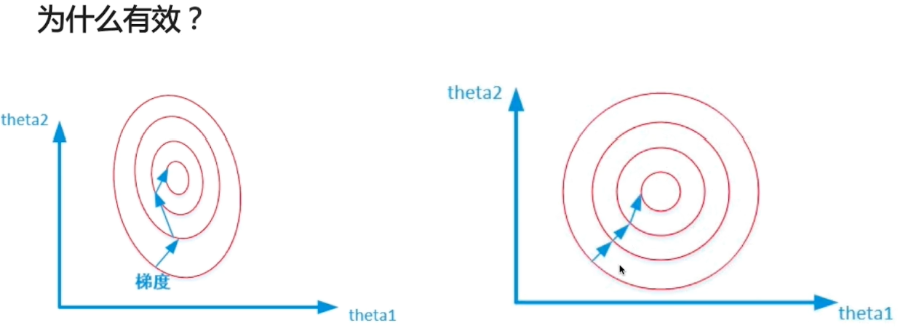

左图是没有归一化的图，右图是归一化的图

左右两图都是等高圆, 左图theta1和theta2在等高圆上虽然不同，但是目标函数还是相同的

梯度下降算法,在左图由于是椭圆，在计算法向量时候,向量指定是不一定是指向圆心的，有可能是偏离圆心的，训练过程变的很曲折；

在右图由于是等高型是正圆，其法向量都是指向圆心，训练过程变的很顺序；

所以归一化的目的就是： 归一化后的训练速度会更快

# Dropout

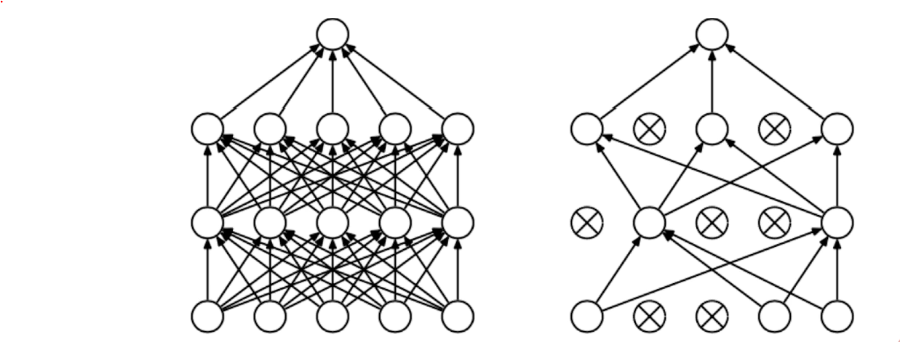

Dropout作用

    1) 防止过拟合
         i) 训练集上很好，测试集合上不好
         ii) 参数太多，记住样本，不能泛化
         
     2) todo 

为啥Dropout能防止过拟合：
    
    每次训练随机屏蔽一些节点，使得训练的时候任意两个节点不能组合去学习数据规律，使得单个节点去学习数据规律,防止记住样本的事情发生
    

神经网络实战

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os 
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd, sklearn,tf,keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.19.2
pandas 0.23.0
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist #手写数据集
# 输出训练集（数据、标签）、测试集（数据、标签）
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
# 把数据划分为训练集、测试集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]

y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))

# 添加20层的神经网络
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu")) #添加全连接层
    
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [5]:
# 输出模型的网络层次
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [6]:
# Tensorboard, earlystopping, ModelCheckpoint

# 把这个路径用包装一下
logdir = os.path.join("dnn_callbacks")
print(logdir)
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),# 保存效果最好的模型
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

# 添加回调函数
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

dnn_callbacks
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 130us/sample - loss: 2.1298 - accuracy: 0.2167 - val_loss: 1.2353 - val_accuracy: 0.4958
Epoch 2/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.8651 - accuracy: 0.6519 - val_loss: 0.6371 - val_accuracy: 0.7710
Epoch 3/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5679 - accuracy: 0.7978 - val_loss: 0.4936 - val_accuracy: 0.8388
Epoch 4/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4779 - accuracy: 0.8357 - val_loss: 0.4427 - val_accuracy: 0.8492
Epoch 5/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4289 - accuracy: 0.8538 - val_loss: 0.4182 - val_accuracy: 0.8626
Epoch 6/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.3991 - accuracy: 0.8642 - val_loss: 0.4428 - val_accuracy: 0.8546
Epoch 7/10
55000/55000 [===============

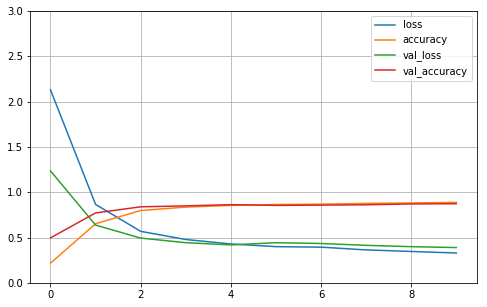

In [8]:
# 打印学习曲线图
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True) #设置网格
    plt.gca().set_ylim(0, 3)
    plt.show()
    
plot_learning_curves(history)

In [9]:
# 在测试集上进行测试
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4124734163999558, 0.86]

出现下面的情况原因: 

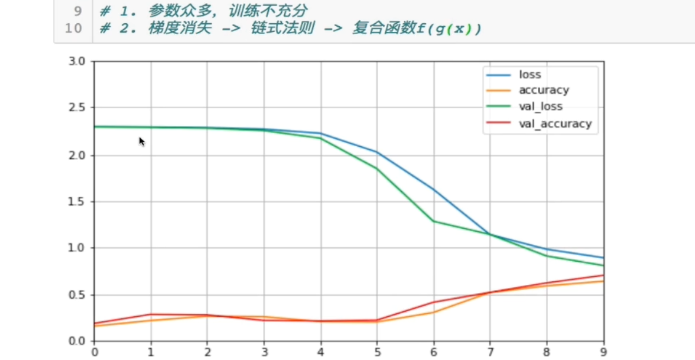